<h1><center> From Border Disputes to Defence Innovations: Topic Modeling Analysis of Indian Defence News  </center> </h1>

## Explpratory Data Aanalysis

In [1]:
import pandas as pd


### Load dataset

In [2]:
df = pd.read_csv('cleaned_military.csv')

In [3]:
df.head()

,Title,Link,Published Date,Article Text
0,Tejas MkII Prototype Production work to being ...,https://idrw.org/tejas-mkii-prototype-producti...,"May 23, 2023",SOURCE: RAUNAK KUNDE / NEWS BEAT / IDRW.ORG. D...
1,China Solidifies JF-17’s Position in Argentina...,https://idrw.org/china-solidifies-jf-17s-posit...,"May 23, 2023",SOURCE: RAUNAK KUNDE / NEWS BEAT / IDRW.ORG. C...
2,Border Security Force Shot Down Pak Drone Carr...,https://idrw.org/border-security-force-shot-do...,"May 23, 2023",SOURCE: ANI Troops of Border Security Force (B...
3,ISRO To Launch NVS-01 Navigation Satellite On ...,https://idrw.org/isro-to-launch-nvs-01-navigat...,"May 23, 2023",SOURCE: PTI The Indian Space Research Organisa...
4,Fuel Tank of MiG-29 Fighter Jet Falls in Fores...,https://idrw.org/fuel-tank-of-mig-29-fighter-j...,"May 23, 2023","SOURCE: API In a recent incident, the fuel tan..."


In [4]:
print(df.describe())


                                                    Title  \
count                                                1514   
unique                                               1512   
top     India issues fresh NOTAM for likely Ship-based...   
freq                                                    2   

                                                     Link Published Date  \
count                                                1514           1514   
unique                                               1514            301   
top     https://idrw.org/tejas-mkii-prototype-producti...    May 6, 2023   
freq                                                    1             30   

                                             Article Text  
count                                                1514  
unique                                               1514  
top     SOURCE: RAUNAK KUNDE / NEWS BEAT / IDRW.ORG. D...  
freq                                                    1  


In [5]:
df.info

<bound method DataFrame.info of                                                   Title  \
0     Tejas MkII Prototype Production work to being ...   
1     China Solidifies JF-17’s Position in Argentina...   
2     Border Security Force Shot Down Pak Drone Carr...   
3     ISRO To Launch NVS-01 Navigation Satellite On ...   
4     Fuel Tank of MiG-29 Fighter Jet Falls in Fores...   
...                                                 ...   
1509        IMRH: Phase-2 design optimization commences   
1510  110kN Engine: Safran at the driving seat but R...   
1511  ALFA-S: Air launched swarming drone system tha...   
1512  WhAP-based Anti-Tank Guided Missile Vehicle pr...   
1513  After Philippines, Indonesia eyes BrahMos from...   

                                                   Link  Published Date  \
0     https://idrw.org/tejas-mkii-prototype-producti...    May 23, 2023   
1     https://idrw.org/china-solidifies-jf-17s-posit...    May 23, 2023   
2     https://idrw.org/border-secu

## a. Analyzing Article Distribution over Time

#### To see how the number of articles varies over different time perids based on year and month from the data column 

#### Visualization 
 #####  - plot the number of articles by year 
 #####  - plot the number of articles by month 

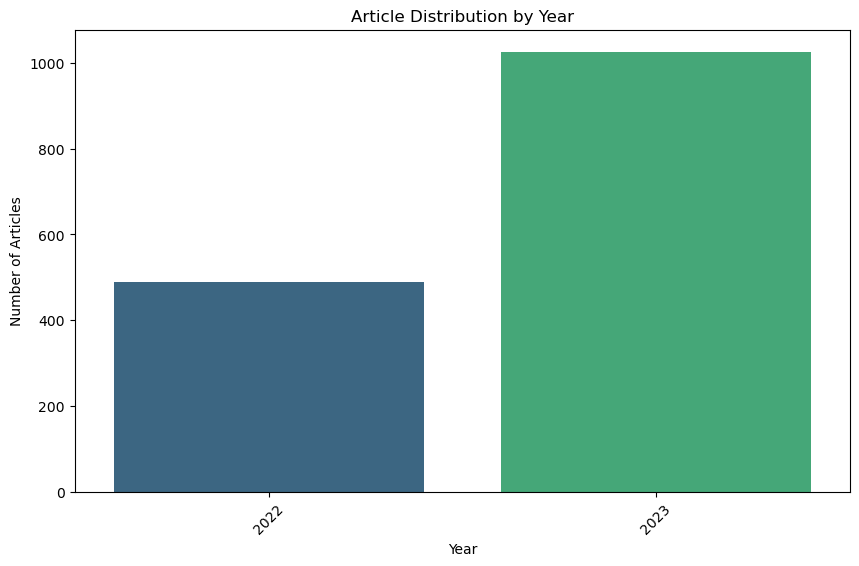

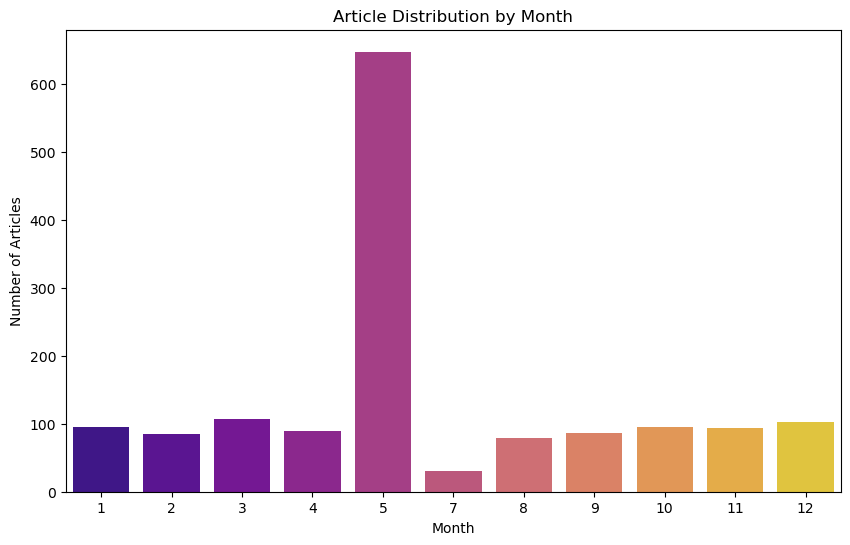

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Published Date to datetime format
df['Published Date'] = pd.to_datetime(df['Published Date'])

# Extract year and month from Published Date
df['Year'] = df['Published Date'].dt.year
df['Month'] = df['Published Date'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df, palette='viridis')  # Applying the 'viridis' palette
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Article Distribution by Year')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='plasma')  # Applying the 'plasma' palette
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Article Distribution by Month')
plt.show()


## b. Identifying Common Keywords and Topics:

## Text preprocessing - as tokenization and removing stopwords. Word frequency analysis or word clouds to identify the most common terms

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### wordcloud for common keywords in Articles

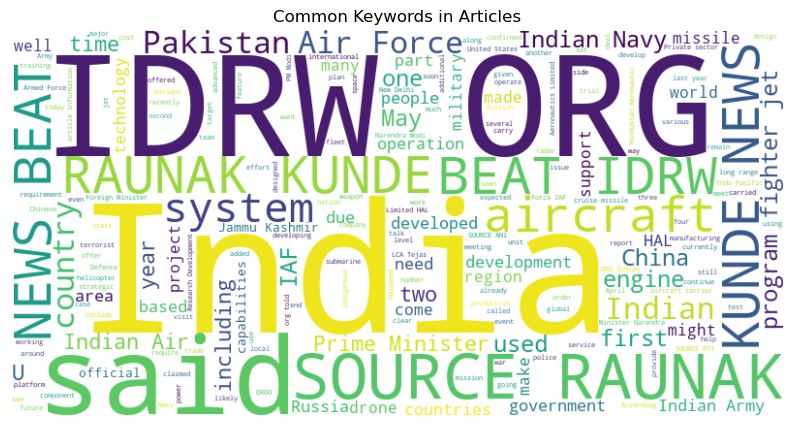

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Tokenize the article text
df['Tokenized Text'] = df['Article Text'].apply(word_tokenize)

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Filtered Text'] = df['Tokenized Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Flatten the list of filtered words
filtered_words = [word for sublist in df['Filtered Text'] for word in sublist]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Keywords in Articles')
plt.show()

## 2. Text Preprocessing:

## Preparing the article text for modeling by performing text preprocessing techniques such as tokenization, lowercasing, removing stopwords, and stemming or lemmatization

Tokenization: Involves splitting the text into individual words/tokens

In [9]:
from nltk.tokenize import word_tokenize

# Tokenize the article text
df['Tokenized Text'] = df['Article Text'].apply(word_tokenize)
# Display the DataFrame with tokenized text
print(df)

                                                  Title  \
0     Tejas MkII Prototype Production work to being ...   
1     China Solidifies JF-17’s Position in Argentina...   
2     Border Security Force Shot Down Pak Drone Carr...   
3     ISRO To Launch NVS-01 Navigation Satellite On ...   
4     Fuel Tank of MiG-29 Fighter Jet Falls in Fores...   
...                                                 ...   
1509        IMRH: Phase-2 design optimization commences   
1510  110kN Engine: Safran at the driving seat but R...   
1511  ALFA-S: Air launched swarming drone system tha...   
1512  WhAP-based Anti-Tank Guided Missile Vehicle pr...   
1513  After Philippines, Indonesia eyes BrahMos from...   

                                                   Link Published Date  \
0     https://idrw.org/tejas-mkii-prototype-producti...     2023-05-23   
1     https://idrw.org/china-solidifies-jf-17s-posit...     2023-05-23   
2     https://idrw.org/border-security-force-shot-do...     2023-05-2

## Look at a couple of texts

In [56]:
print(repr(df.iloc[1000]["Title"][0:200]))


'India postpones Third NOTAM for this Month'


Lowercasing: Converting all the tokens to lowercase to ensure case insensitivity.

In [10]:
df['Tokenized Text'] = df['Tokenized Text'].apply(lambda x: [word.lower() for word in x])
print(df)

                                                  Title  \
0     Tejas MkII Prototype Production work to being ...   
1     China Solidifies JF-17’s Position in Argentina...   
2     Border Security Force Shot Down Pak Drone Carr...   
3     ISRO To Launch NVS-01 Navigation Satellite On ...   
4     Fuel Tank of MiG-29 Fighter Jet Falls in Fores...   
...                                                 ...   
1509        IMRH: Phase-2 design optimization commences   
1510  110kN Engine: Safran at the driving seat but R...   
1511  ALFA-S: Air launched swarming drone system tha...   
1512  WhAP-based Anti-Tank Guided Missile Vehicle pr...   
1513  After Philippines, Indonesia eyes BrahMos from...   

                                                   Link Published Date  \
0     https://idrw.org/tejas-mkii-prototype-producti...     2023-05-23   
1     https://idrw.org/china-solidifies-jf-17s-posit...     2023-05-23   
2     https://idrw.org/border-security-force-shot-do...     2023-05-2

Removing Stopwords: Stopwords are common words that do not carry significant meaning and can be removed from the text.

In [11]:
from nltk.corpus import stopwords

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Filtered Text'] = df['Tokenized Text'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
print(df)

                                                  Title  \
0     Tejas MkII Prototype Production work to being ...   
1     China Solidifies JF-17’s Position in Argentina...   
2     Border Security Force Shot Down Pak Drone Carr...   
3     ISRO To Launch NVS-01 Navigation Satellite On ...   
4     Fuel Tank of MiG-29 Fighter Jet Falls in Fores...   
...                                                 ...   
1509        IMRH: Phase-2 design optimization commences   
1510  110kN Engine: Safran at the driving seat but R...   
1511  ALFA-S: Air launched swarming drone system tha...   
1512  WhAP-based Anti-Tank Guided Missile Vehicle pr...   
1513  After Philippines, Indonesia eyes BrahMos from...   

                                                   Link Published Date  \
0     https://idrw.org/tejas-mkii-prototype-producti...     2023-05-23   
1     https://idrw.org/china-solidifies-jf-17s-posit...     2023-05-23   
2     https://idrw.org/border-security-force-shot-do...     2023-05-2

Stemming: Technique used to reduce words to their root form. Stemming reduces words to their base or stem form.

In [12]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to the filtered text
df['Stemmed Text'] = df['Filtered Text'].apply(lambda x: [stemmer.stem(word) for word in x])
print(df)

                                                  Title  \
0     Tejas MkII Prototype Production work to being ...   
1     China Solidifies JF-17’s Position in Argentina...   
2     Border Security Force Shot Down Pak Drone Carr...   
3     ISRO To Launch NVS-01 Navigation Satellite On ...   
4     Fuel Tank of MiG-29 Fighter Jet Falls in Fores...   
...                                                 ...   
1509        IMRH: Phase-2 design optimization commences   
1510  110kN Engine: Safran at the driving seat but R...   
1511  ALFA-S: Air launched swarming drone system tha...   
1512  WhAP-based Anti-Tank Guided Missile Vehicle pr...   
1513  After Philippines, Indonesia eyes BrahMos from...   

                                                   Link Published Date  \
0     https://idrw.org/tejas-mkii-prototype-producti...     2023-05-23   
1     https://idrw.org/china-solidifies-jf-17s-posit...     2023-05-23   
2     https://idrw.org/border-security-force-shot-do...     2023-05-2

## 3. Feature Extraction:

### Using techniques like TF-IDF (Term Frequency-Inverse Document Frequency) and word embeddings to convert the text into numerical features that can be used for machine learning

In [59]:
# Initialize the TfidfVectorizer, this time we're doing it after removing stopwords
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)

# Convert the TF-IDF matrix to a dense DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF Features Shape:", tfidf_df.shape)


TF-IDF Features Shape: (1514, 14015)


TF-IDF (Term Frequency-Inverse Document Frequency): TF-IDF is a widely used technique that assigns weights to words based on their frequency in a document and across the entire corpus

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer



# Join the list of preprocessed words into a single string
preprocessed_text = df['Stemmed Text'].apply(' '.join)

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit-transform the preprocessed text
tfidf_features = tfidf_vectorizer.fit_transform(preprocessed_text)

# Get the feature names from the vectorizer's vocabulary
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=feature_names)

# Print the TF-IDF DataFrame
print(tfidf_df)


       00  000  000ft  000hp  000kg  000km  000m  000t  000th        01  ...  \
0     0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   
1     0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   
2     0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   
3     0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.364335  ...   
4     0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   
...   ...  ...    ...    ...    ...    ...   ...   ...    ...       ...  ...   
1509  0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   
1510  0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   
1511  0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   
1512  0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   
1513  0.0  0.0    0.0    0.0    0.0    0.0   0.0   0.0    0.0  0.000000  ...   

      zorya  ztq   zu  zulfiqar  zurham

Word Embeddings (Word2Vec or GloVe): Word embeddings represent words in a continuous vector space, where the vectors capture semantic relationships between words.

In [15]:
from gensim.models import Word2Vec

# Tokenized text from 'Stemmed Text' column
tokenized_text = df['Stemmed Text']

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1)

# Get the word embeddings
word_embeddings = word2vec_model.wv


# Access the word vector for a specific word
vector = word_embeddings['word']
print(vector)

[-0.03586244 -0.03975084  0.15336847  0.28902116  0.10368405 -0.39389938
  0.16470776  0.38018826 -0.14226902 -0.12235758 -0.10483471 -0.00701538
 -0.23273726  0.00151653 -0.03553954  0.03019908  0.15181616 -0.13578667
 -0.00258216 -0.41391298 -0.02786967 -0.04058814  0.14610948 -0.3104558
  0.07888036 -0.18945725 -0.28695887  0.04422176 -0.04445058  0.04120285
  0.07427321  0.0237624   0.15324351 -0.15147394 -0.08631647  0.23574768
  0.2586811  -0.02958633 -0.12130821 -0.06412166 -0.12178844 -0.03459949
 -0.06159125 -0.13363169  0.22840028 -0.07962982  0.00298048 -0.11890427
  0.22303824  0.2446797  -0.02999748 -0.11474697  0.19854684 -0.01439819
 -0.04361952 -0.01620644  0.14403372 -0.00928872 -0.12806721  0.2703637
 -0.00082738 -0.00042379  0.07887793 -0.04364192  0.01141999  0.22403555
  0.113253    0.02199614 -0.4008106   0.16740789 -0.15032445  0.0809648
  0.05808406 -0.04862908  0.1325181   0.04935572 -0.00510433 -0.18957993
 -0.3894493  -0.13018104  0.05607314  0.03228732 -0.31

## 4. Model Training

Latent Dirichlet Allocation (LDA): LDA is a probabilistic topic modeling technique that assumes each document is a mixture of various topics and each topic is a distribution of words.

In [16]:
from gensim import corpora, models

# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary(tokenized_text)

# Convert tokenized text to bag-of-words representation
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Train the LDA model
num_topics = 10  # Specify the number of topics to discover
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Get the topics and their associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.055*"," + 0.044*"." + 0.025*"articl" + 0.014*"inform" + 0.011*"opinion" + 0.009*"’" + 0.008*"idrw.org" + 0.008*"”" + 0.007*"india" + 0.007*"take"')
(1, '0.049*"," + 0.046*"." + 0.012*")" + 0.012*"(" + 0.012*"indian" + 0.011*"’" + 0.009*"navi" + 0.007*"exercis" + 0.006*"oper" + 0.006*"air"')
(2, '0.043*"." + 0.035*"," + 0.017*")" + 0.017*"(" + 0.013*"/" + 0.011*"aircraft" + 0.010*"indian" + 0.010*"idrw.org" + 0.009*"india" + 0.009*"develop"')
(3, '0.039*"." + 0.036*"," + 0.030*"submarin" + 0.018*"navi" + 0.013*"indian" + 0.011*"india" + 0.010*"nuclear" + 0.010*"’" + 0.007*")" + 0.007*"("')
(4, '0.043*"." + 0.036*"missil" + 0.029*"," + 0.015*"(" + 0.015*")" + 0.015*"system" + 0.012*"/" + 0.012*"rang" + 0.011*"develop" + 0.008*"’"')
(5, '0.055*"," + 0.035*"." + 0.011*")" + 0.010*"(" + 0.010*"said" + 0.009*"terrorist" + 0.008*"district" + 0.007*"manipur" + 0.007*"”" + 0.007*"state"')
(6, '0.048*"engin" + 0.020*"," + 0.019*"." + 0.014*"kaveri" + 0.013*"thrust" + 0.011*"dri" + 0.008*"

Non-negative Matrix Factorization (NMF): NMF is a matrix factorization technique that can be used for topic modeling.

In [17]:
from sklearn.decomposition import NMF

# Create the TF-IDF matrix
tfidf_matrix = tfidf_features.toarray()

# Train the NMF model
num_topics = 10  # Specify the number of topics to discover
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# Get the feature names from the vectorizer's vocabulary
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the topics and their associated words
for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"Topic #{topic_idx}:")
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(top_words)

Topic #0:
['iaf', 'teja', 'aircraft', 'jet', 'fighter', 'hal', 'air', 'lca', 'trainer', 'forc']
Topic #1:
['modi', 'said', 'prime', 'minist', 'visit', 'india', 'pm', 'summit', 'quad', 'pacif']
Topic #2:
['missil', 'rang', 'air', 'brahmo', 'cruis', 'notam', 'system', 'test', 'launch', 'ballist']
Topic #3:
['submarin', 'nuclear', 'navi', 'class', 'india', 'offer', 'attack', 'program', 'indian', 'kalvari']
Topic #4:
['engin', 'program', 'amca', 'develop', 'ge', 'thrust', 'gener', 'kaveri', 'india', 'f414']
Topic #5:
['drone', 'system', 'uav', 'armi', 'gun', 'develop', 'tank', 'vehicl', 'indian', 'defenc']
Topic #6:
['said', 'terrorist', 'polic', 'kashmir', 'jammu', 'armi', 'district', 'area', 'offici', 'secur']
Topic #7:
['articl', 'opinion', 'inform', 'writer', 'respons', 'take', 'org', 'idrw', 'satyajeet', 'kumar']
Topic #8:
['navi', 'carrier', 'aircraft', 'indian', 'in', 'deck', 'vikrant', 'ship', 'oper', 'maritim']
Topic #9:
['sco', 'pakistan', 'foreign', 'minist', 'india', 'meet', 'j

## 5. Interpretation of Results:

### Analyzing the outputs from the trained model and extracting meaningful insights from the discovered trends or clusters

Topic Distribution: Calculating the topic distribution for each document/article and determining the dominant topic and its corresponding probability.

In [18]:
import numpy as np

# Calculate the topic distribution for each document
topic_distribution = nmf_model.transform(tfidf_matrix)

# Determine the dominant topic for each document
dominant_topics = np.argmax(topic_distribution, axis=1)

# Get the corresponding probabilities for the dominant topics
dominant_topic_probs = np.max(topic_distribution, axis=1)


In [19]:
print("Dominant Topics:")
print(dominant_topics)

print("\nDominant Topic Probabilities:")
print(dominant_topic_probs)


Dominant Topics:
[0 0 6 ... 5 5 2]

Dominant Topic Probabilities:
[0.11166139 0.06312191 0.08867979 ... 0.12901715 0.12310739 0.16577032]


## Topic Frequency Over Time

In [23]:
# Assuming 'corpus' is your bag-of-words representation of the documents
dominant_topics = []
dominant_topic_probs = []

for bow in corpus:
    # Get the topic distribution for the document
    doc_topics = lda_model.get_document_topics(bow, minimum_probability=0.0)
    
    # Sort the topics by probability
    doc_topics = sorted(doc_topics, key=lambda x: x[1], reverse=True)
    
    # Get the most probable topic and its probability
    most_probable_topic = doc_topics[0]
    
    # Append the most probable topic ID and its probability to the lists
    dominant_topics.append(most_probable_topic[0])
    dominant_topic_probs.append(most_probable_topic[1])

# Add the dominant topic IDs and their probabilities to the DataFrame
df['dominant_topics'] = dominant_topics
df['dominant_topic_probability'] = dominant_topic_probs

# Now you can group by 'Year' and 'dominant_topics'
topic_counts_by_year = df.groupby(['Year', 'dominant_topics']).size().reset_index(name='Article Count')
print(topic_counts_by_year)


    Year  dominant_topics  Article Count
0   2022                0             20
1   2022                1             13
2   2022                2            349
3   2022                3             19
4   2022                4             67
5   2022                7              3
6   2022                8             12
7   2022                9              5
8   2023                0             15
9   2023                1             55
10  2023                2            379
11  2023                3             40
12  2023                4             65
13  2023                5             26
14  2023                6              4
15  2023                7            202
16  2023                8              7
17  2023                9            233


## Calculate the co-occurrence matrix

In [24]:
# Calculate the co-occurrence matrix
co_occurrence_matrix = topic_distribution.T.dot(topic_distribution)

# Compute pointwise mutual information (PMI)
total_docs = len(df)
topic_probs = topic_distribution.sum(axis=0) / total_docs
pmi = np.log(co_occurrence_matrix / (topic_probs[:, np.newaxis] * topic_probs))

In [35]:
print("Co-occurrence Matrix:")
print(co_occurrence_matrix)

print("\nPMI Matrix:")
print(pmi)


Co-occurrence Matrix:
[[2.41860225 0.19812167 0.48552427 0.17320605 0.69458502 0.52653294
  0.10776338 0.44119527 0.54867457 0.18007166]
 [0.19812167 4.13777304 0.18792198 0.22576758 0.24389681 0.361318
  0.37231748 0.27485328 0.306033   0.92145533]
 [0.48552427 0.18792198 4.83639172 0.39747947 0.34306536 0.92004225
  0.11254966 0.41709709 0.46400779 0.16386903]
 [0.17320605 0.22576758 0.39747947 4.05504581 0.23007772 0.36203308
  0.08066246 0.55241524 0.42287195 0.18391139]
 [0.69458502 0.24389681 0.34306536 0.23007772 4.06514733 0.68541742
  0.07779503 0.43858416 0.4268395  0.16382335]
 [0.52653294 0.361318   0.92004225 0.36203308 0.68541742 4.72749894
  0.38338572 0.4724936  0.61756799 0.32494482]
 [0.10776338 0.37231748 0.11254966 0.08066246 0.07779503 0.38338572
  2.22266875 0.16553056 0.19300324 0.66888287]
 [0.44119527 0.27485328 0.41709709 0.55241524 0.43858416 0.4724936
  0.16553056 3.75208468 0.44070969 0.32701618]
 [0.54867457 0.306033   0.46400779 0.42287195 0.4268395  0.61

## 6. Visualization and Reporting:

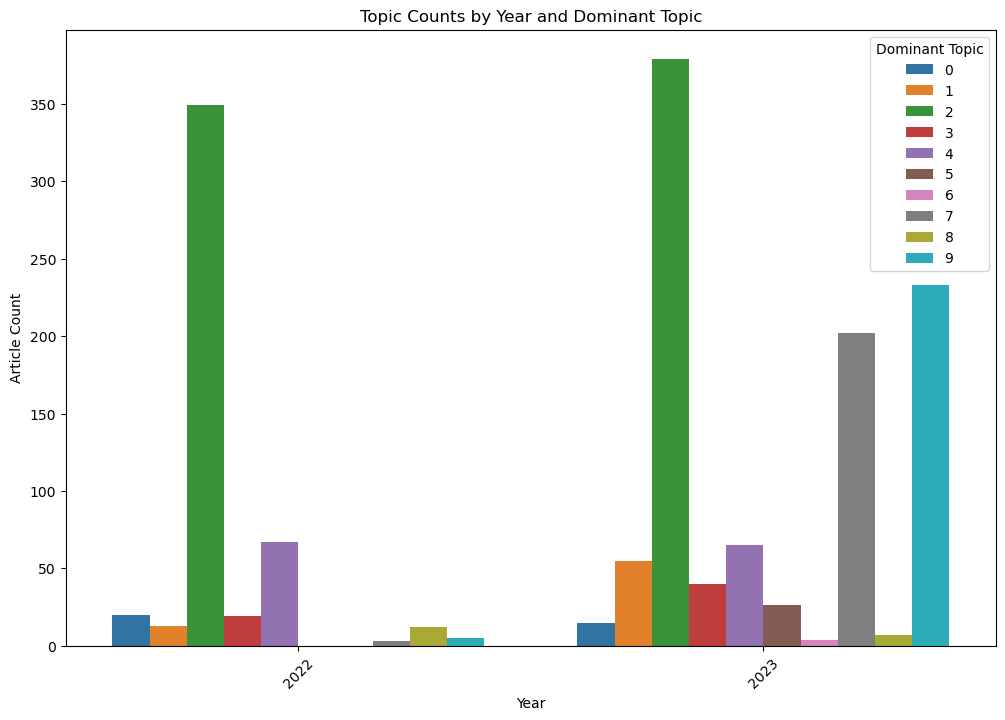

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame 'topic_counts_by_year' has been created correctly with 'Year' and 'dominant_topics' columns

# Create a bar plot
plt.figure(figsize=(12, 8))
# Adjust 'hue' to match the correct column name, assuming it's 'dominant_topics' based on your data manipulation
sns.barplot(x='Year', y='Article Count', hue='dominant_topics', data=topic_counts_by_year)
plt.xlabel('Year')
plt.ylabel('Article Count')
plt.title('Topic Counts by Year and Dominant Topic')
plt.xticks(rotation=45)
# Adjust the legend title to match the correct column name
plt.legend(title='Dominant Topic')
plt.show()


## Topics and their associated words

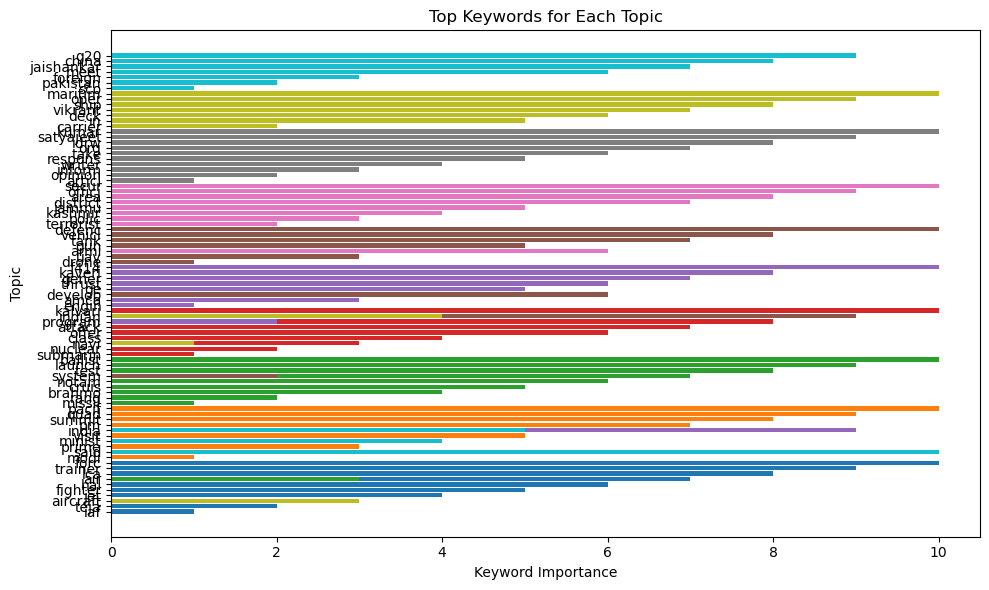

In [38]:
import matplotlib.pyplot as plt

# Get the topics and their associated words
topics = []
top_words = []
for topic_idx, topic in enumerate(nmf_model.components_):
    topics.append(f"Topic #{topic_idx}")
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words.append([feature_names[i] for i in top_words_idx])

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
for i in range(len(topics)):
    plt.barh(top_words[i], np.arange(1, 11))
plt.xlabel('Keyword Importance')
plt.ylabel('Topic')
plt.title('Top Keywords for Each Topic')
plt.tight_layout()
plt.show()


## Create a bar plot

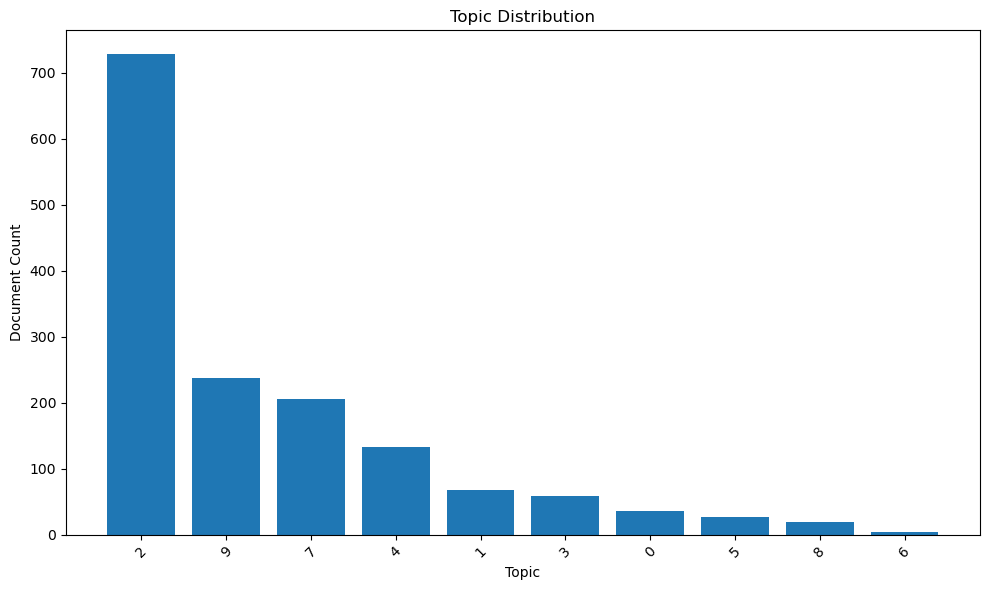

In [29]:
import matplotlib.pyplot as plt

# Calculate the count of documents for each topic
# Make sure to use the correct column name here
topic_counts = df['dominant_topics'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index.astype(str), topic_counts.values)  # Cast index to string to ensure it's treated as categorical
plt.xlabel('Topic')
plt.ylabel('Document Count')
plt.title('Topic Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Create a heatmap

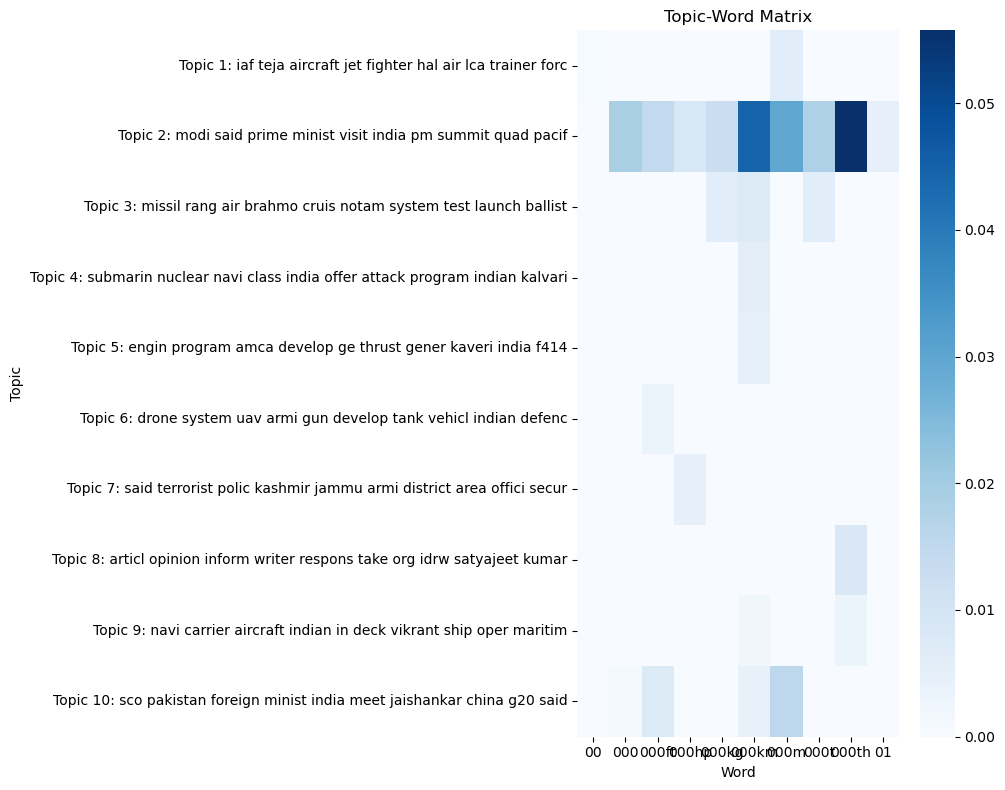

In [36]:
import seaborn as sns

# Set the number of topics and words to display in the heatmap
num_topics_to_display = 10
num_words_to_display = 10

# Get the top words for each topic
top_words_per_topic = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words_idx = topic.argsort()[:-num_words_to_display - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_words_per_topic.append(top_words)

# Create a subset of the topic-word matrix
topic_word_matrix_subset = topic_word_matrix[:num_words_to_display, :num_topics_to_display]

# Create a list of words and topics to display
words_to_display = feature_names[:num_words_to_display]
topics_to_display = [f"Topic {idx+1}: {' '.join(top_words_per_topic[idx])}" for idx in range(num_topics_to_display)]

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(topic_word_matrix_subset.T, cmap='Blues', xticklabels=words_to_display, yticklabels=topics_to_display)
plt.xlabel('Word')
plt.ylabel('Topic')
plt.title('Topic-Word Matrix')
plt.tight_layout()
plt.show()

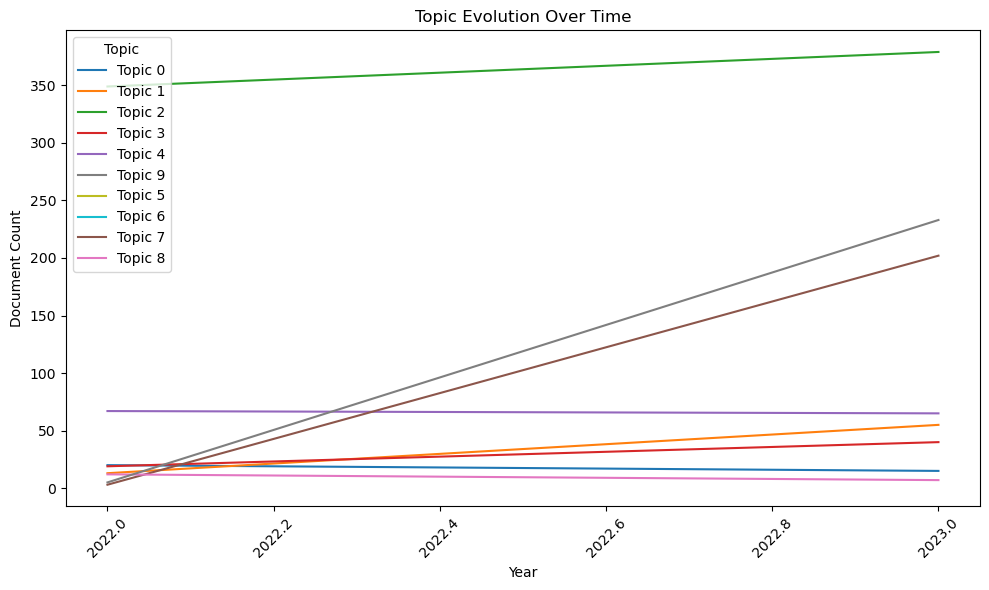

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'Year' and 'dominant_topics' columns correctly set up
# Adjust 'Dominant Topic' to 'dominant_topics' if that's what's used in your DataFrame
topic_counts_by_year = df.groupby(['Year', 'dominant_topics']).size().reset_index(name='Document Count')

# Create a line chart for each topic
plt.figure(figsize=(10, 6))
for topic in topic_counts_by_year['dominant_topics'].unique():
    topic_data = topic_counts_by_year[topic_counts_by_year['dominant_topics'] == topic]
    plt.plot(topic_data['Year'], topic_data['Document Count'], label=f"Topic {topic}")

plt.xlabel('Year')
plt.ylabel('Document Count')
plt.title('Topic Evolution Over Time')
plt.xticks(rotation=45)
# Optional: Sorting the legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [int(label.split(' ')[1]) for label in labels]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Topic', loc='upper left')
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Replace 'your_dataset.csv' with the path to your CSV file
df = pd.read_csv('cleaned_military.csv')

# Ensure 'Article Text' is the correct column name containing the text you want to analyze
print(df.head())  # This will print the first few rows of your DataFrame to check it's loaded correctly


                                               Title  \
0  Tejas MkII Prototype Production work to being ...   
1  China Solidifies JF-17’s Position in Argentina...   
2  Border Security Force Shot Down Pak Drone Carr...   
3  ISRO To Launch NVS-01 Navigation Satellite On ...   
4  Fuel Tank of MiG-29 Fighter Jet Falls in Fores...   

                                                Link Published Date  \
0  https://idrw.org/tejas-mkii-prototype-producti...   May 23, 2023   
1  https://idrw.org/china-solidifies-jf-17s-posit...   May 23, 2023   
2  https://idrw.org/border-security-force-shot-do...   May 23, 2023   
3  https://idrw.org/isro-to-launch-nvs-01-navigat...   May 23, 2023   
4  https://idrw.org/fuel-tank-of-mig-29-fighter-j...   May 23, 2023   

                                        Article Text  
0  SOURCE: RAUNAK KUNDE / NEWS BEAT / IDRW.ORG. D...  
1  SOURCE: RAUNAK KUNDE / NEWS BEAT / IDRW.ORG. C...  
2  SOURCE: ANI Troops of Border Security Force (B...  
3  SOURCE: PTI T

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\geeth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


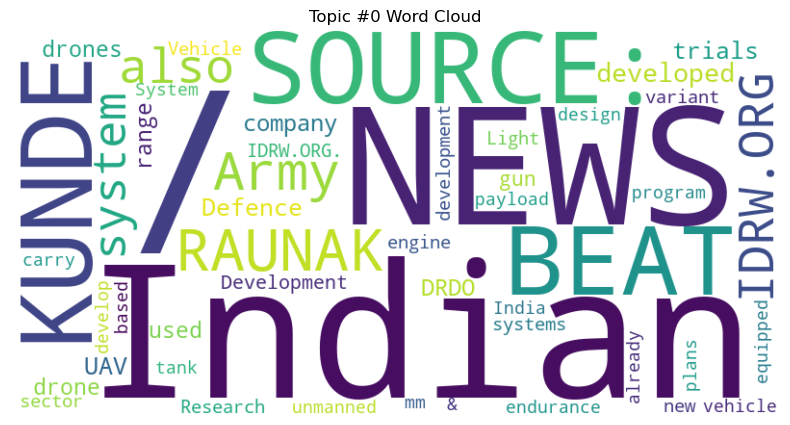

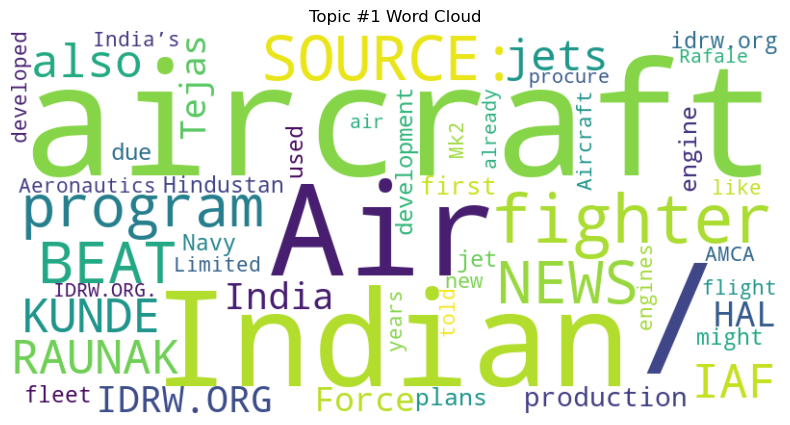

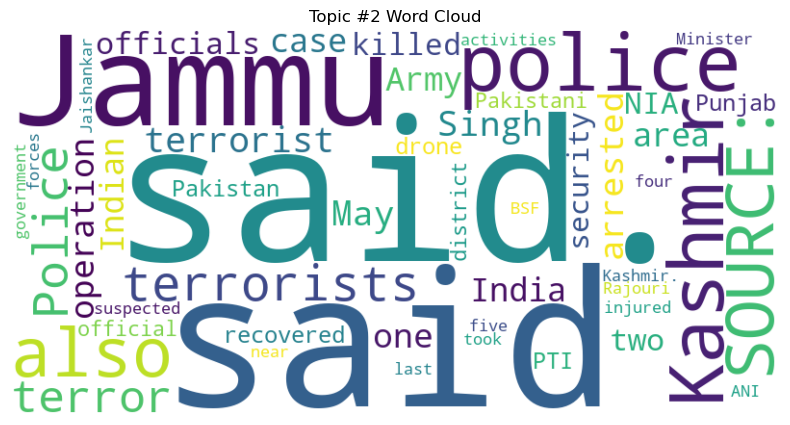

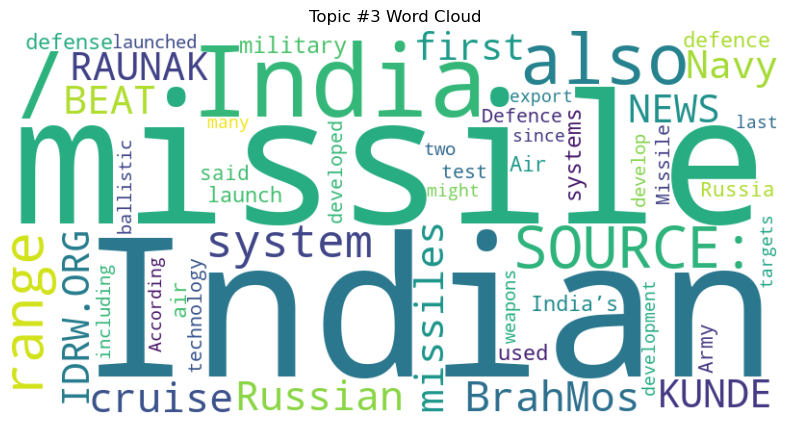

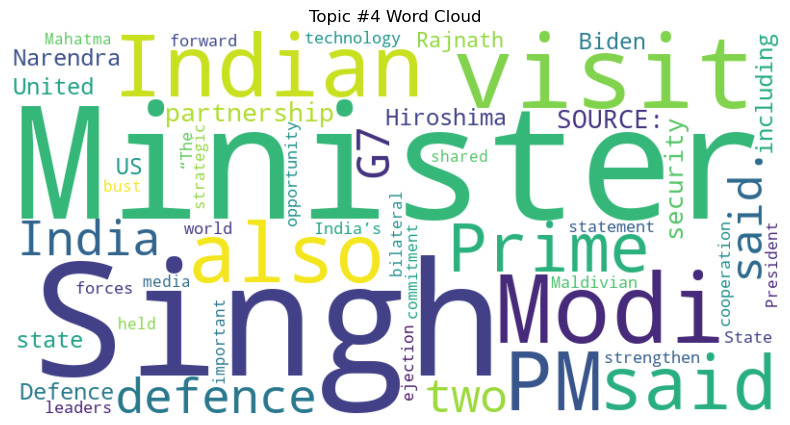

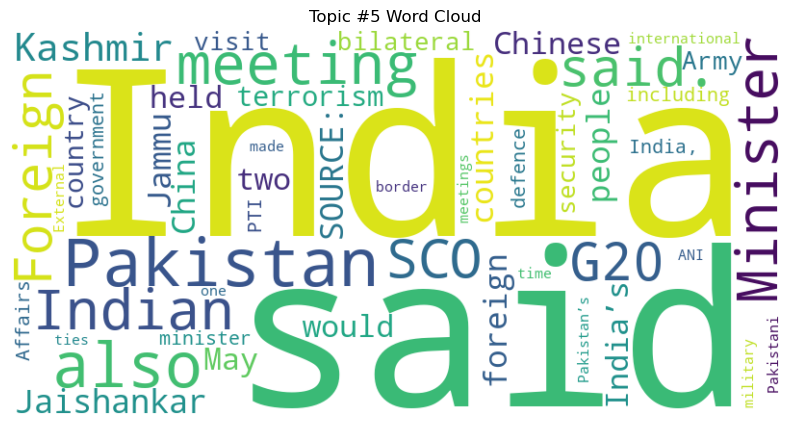

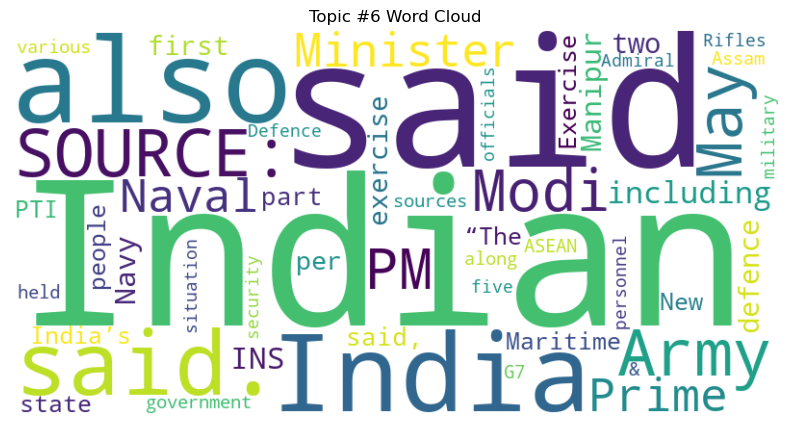

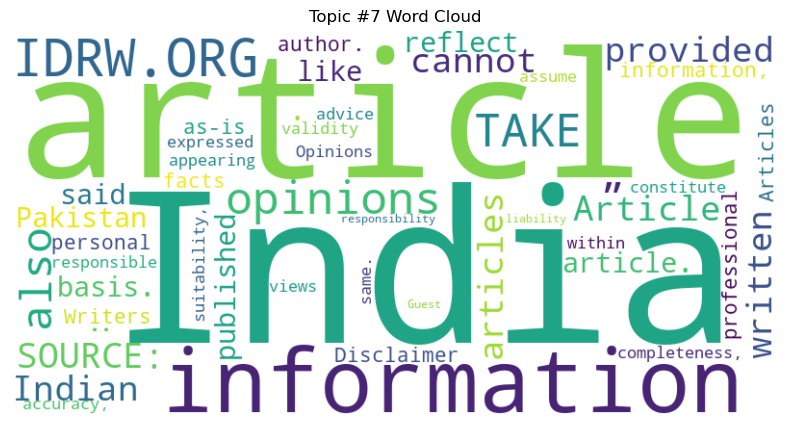

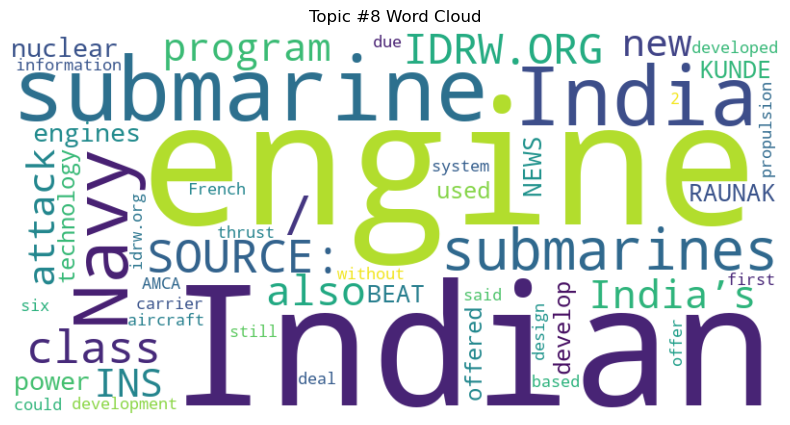

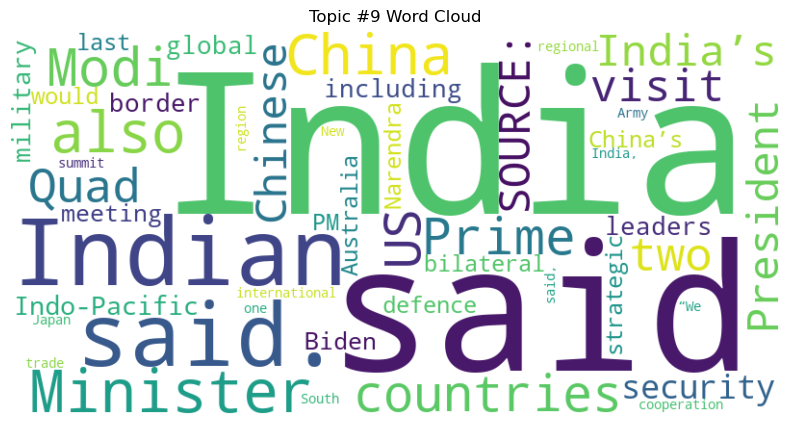

In [3]:
import pandas as pd
from gensim import corpora, models
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Assuming you've already loaded your DataFrame 'df' as shown previously

# Download stopwords from nltk
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Update the tokenization step to remove stopwords
texts = df['Article Text'].apply(lambda x: [word for word in x.split() if word.lower() not in stop_words])  # Tokenization with stopwords removal

# Create a dictionary and corpus needed for topic modeling
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Apply LDA topic modeling
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Generate and display word clouds for each topic
for t in range(lda_model.num_topics):
    # Get the word distribution for the topic
    topic_words = lda_model.show_topic(t, topn=50)

    # Convert the word distribution into a dictionary for the word cloud
    word_frequencies = {word: freq for word, freq in topic_words}

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic #{t} Word Cloud')
    plt.show()
